In [1]:
import os
from annot import annotations
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import utility
import numpy as np
import configurations
import model_gen
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [2]:
data_loader = annotations.Data()
util = utility.Util()
config = configurations.Configuration()

In [3]:
df = util.get_dataframe()

In [4]:
sample = list(df.iloc[0])

In [5]:
im = util.imread_from_id(sample[0])
keypoints = np.array(sample[1:])

test_im = im.copy()
rescaled = test_im / 255
resized = cv2.resize(rescaled, (224,224))

In [6]:
keypoints

array([582, 570, 594, 497, 603, 390, 652, 394, 667, 468, 652, 553, 628,
       392, 627, 249, 627, 236, 628, 128, 553, 280, 549, 297, 578, 247,
       675, 251, 671, 288, 688, 334, 665, 362])

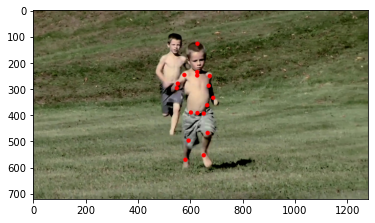

In [7]:
plt.imshow(util.to_rgb(util.draw_keypoints(im, keypoints, 8)))

In [8]:
model = tf.keras.models.load_model("models/model_v5/")

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
y_pred = model.predict(resized.reshape(1,224,224,3))

1/1 [==============================] - 3s 3s/step


In [11]:
y_pred = y_pred.ravel()

In [12]:
y_pred

array([556.8597 , 563.2428 , 568.2455 , 561.30865, 564.7925 , 571.6997 ,
       555.50525, 572.4495 , 567.59656, 562.9754 , 556.14087, 567.20526,
       561.5906 , 562.0503 , 567.5693 , 564.4286 , 562.0869 , 560.6339 ,
       560.8805 , 562.1309 , 559.0177 , 564.2379 , 567.3443 , 562.7633 ,
       568.23047, 567.2839 , 562.7828 , 567.9839 , 562.8892 , 560.25934,
       570.70807, 567.93463, 564.8565 , 555.7136 ], dtype=float32)

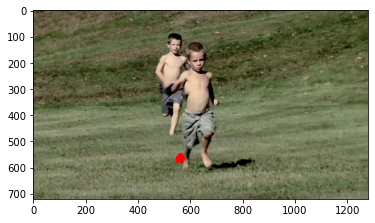

In [13]:
plt.imshow(util.to_rgb(util.draw_keypoints(test_im, y_pred.astype(int), 10)))

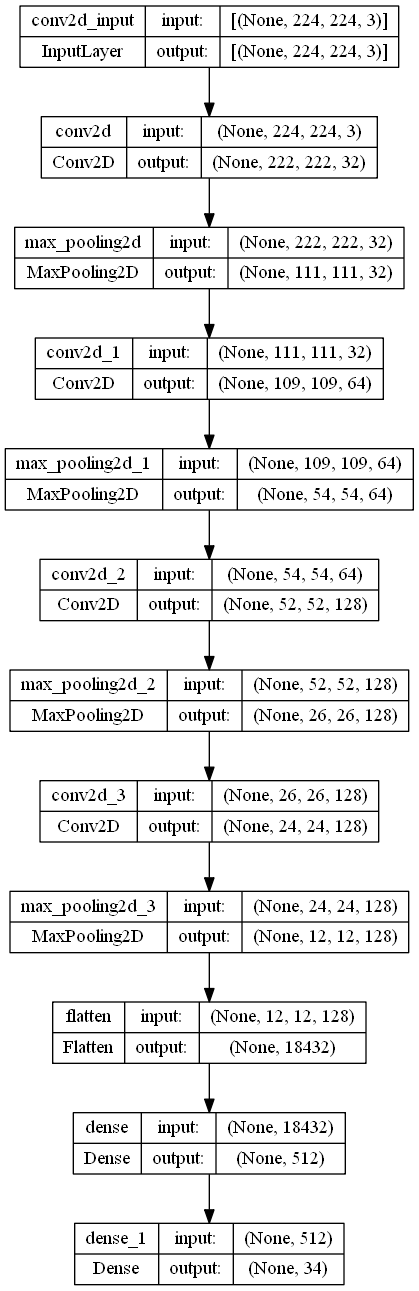

In [14]:
plot_model(model,"model_plot.png",show_shapes=True,show_layer_names=True)